In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
#결측치 유무/구하는 방법 1
df.info()

#결측치 유무/구하는 방법 2
df.isnull()

#결측치 유무/구하는 방법 3
df_null = df.isnull()
df_null.sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.describe() #수치데이터에 대한 요약

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
feature_columns = df.columns[:-1].tolist() #outcome 제외(label값이라서)
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
cols = feature_columns[1:] #Pregnancies는 0일 수 있음.
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df_null = df[cols].replace(0, np.nan) #0을 결측치라 가정하고 0은 NaN으로 바꿈
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
df_null.mean() * 100 #결측치 비율

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

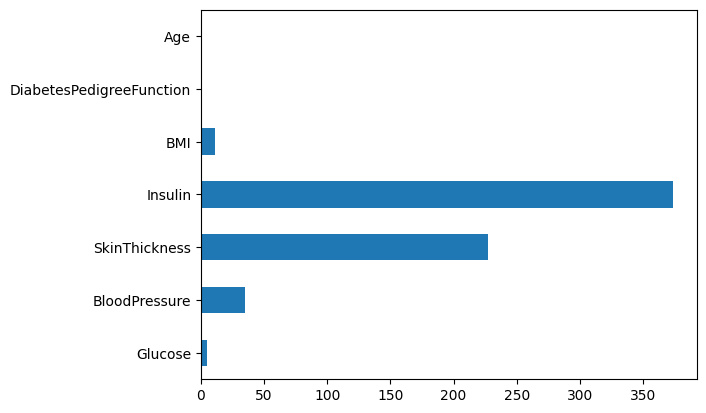

In [ ]:
df_null.sum().plot.barh() #막대그래프

<Axes: >

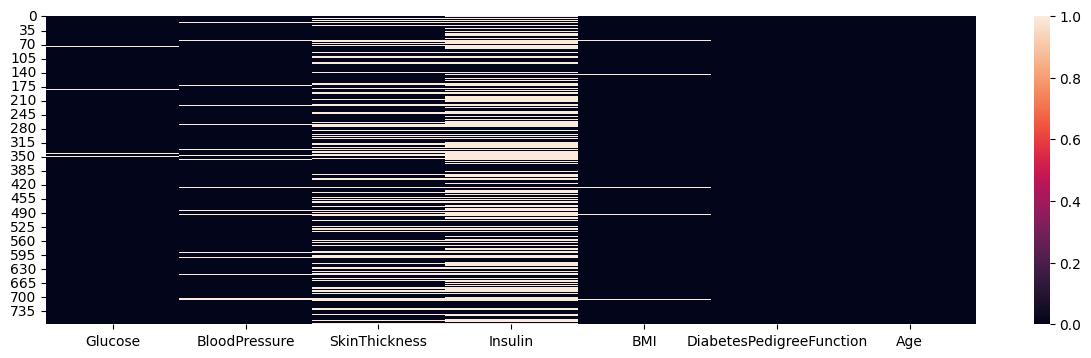

In [ ]:
plt.figure(figsize = (15, 4))
sns.heatmap(df_null) #히트맵

In [ ]:
df["Outcome"].value_counts() #발병 1, 미발병 0
#df["Outcome"].value_counts(normalize=True) <ㅡ 비율확인하기

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df.groupby(["Pregnancies"])["Outcome"].mean()

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14    1.000000
15    1.000000
17    1.000000
Name: Outcome, dtype: float64

In [ ]:
df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"])

mean  count
Pregnancies                 
0            0.342342    111
1            0.214815    135
2            0.184466    103
3            0.360000     75
4            0.338235     68
5            0.368421     57
6            0.320000     50
7            0.555556     45
8            0.578947     38
9            0.642857     28
10           0.416667     24
11           0.636364     11
12           0.444444      9
13           0.500000     10
14           1.000000      2
15           1.000000      1
17           1.000000      1

In [ ]:
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

<Axes: >

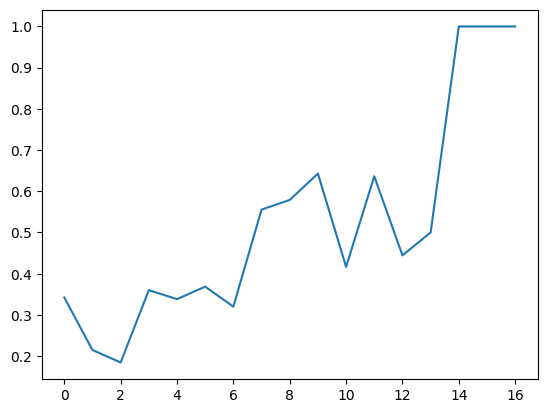

In [ ]:
df_po["mean"].plot()

<Axes: xlabel='Outcome', ylabel='count'>

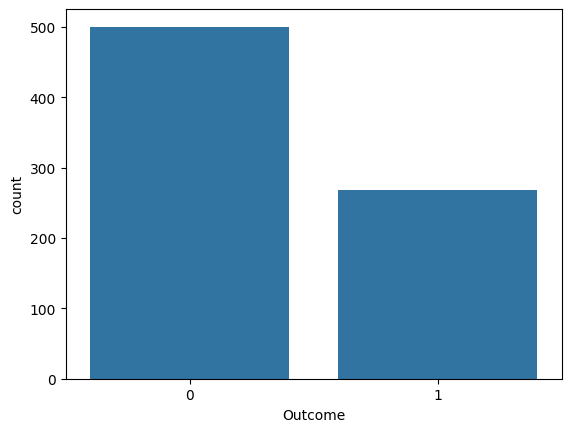

In [ ]:
sns.countplot(data=df, x="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

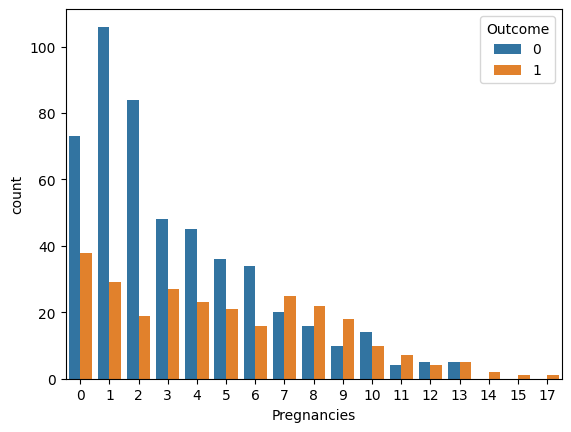

In [ ]:
sns.countplot(data=df, x="Pregnancies", hue = "Outcome")

In [ ]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

<Axes: xlabel='Pregnancies_high', ylabel='count'>

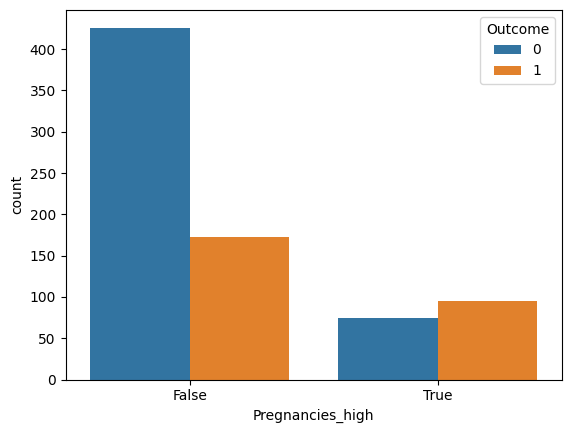

In [ ]:
sns.countplot(data=df, x="Pregnancies_high", hue = "Outcome")

<Axes: xlabel='Outcome', ylabel='BMI'>

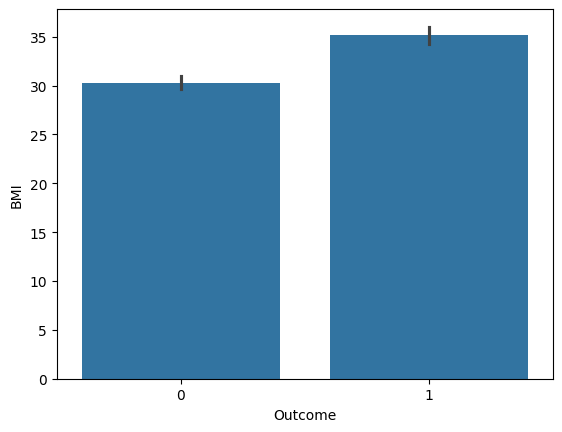

In [ ]:
#당뇨병 발병에 따른 BMI 수치
sns.barplot(data = df, x="Outcome", y="BMI")

<Axes: xlabel='Outcome', ylabel='Glucose'>

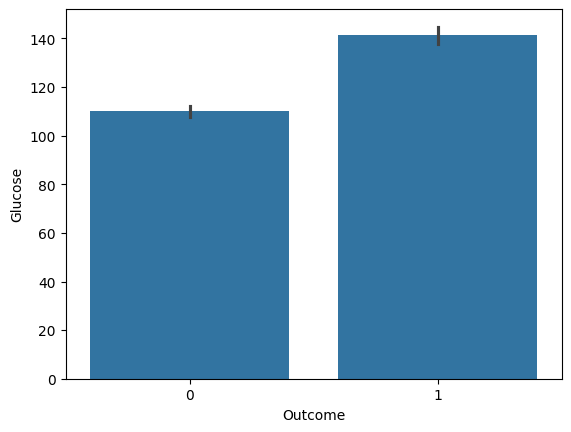

In [ ]:
#당뇨병 발병에 따른 글루코스 수치
sns.barplot(data = df, x="Outcome", y="Glucose")

<Axes: xlabel='Outcome', ylabel='Insulin'>

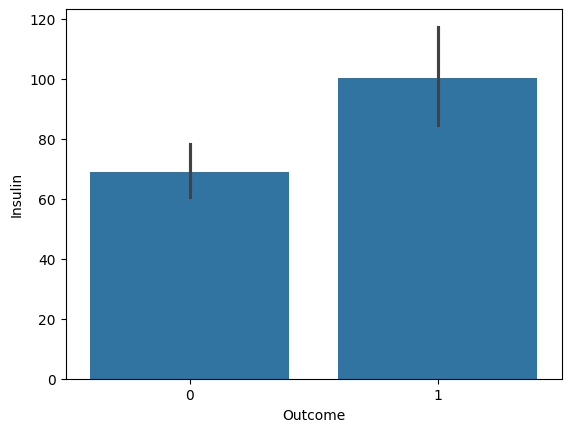

In [ ]:
#insulin 수치가 0이상인 관측치에 대해서 당뇨병 발병 비교
sns.barplot(data=df, x="Outcome", y="Insulin")

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

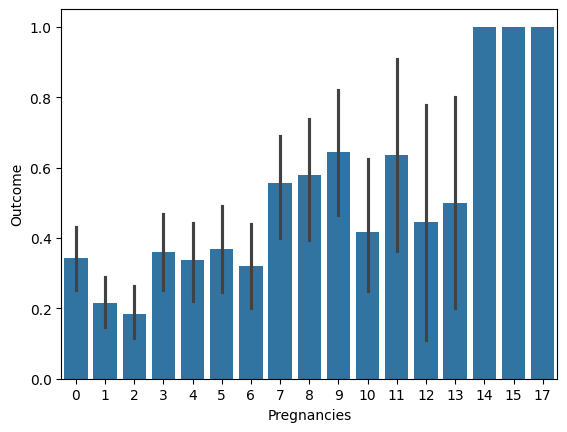

In [ ]:
sns.barplot(data=df, x = "Pregnancies", y="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

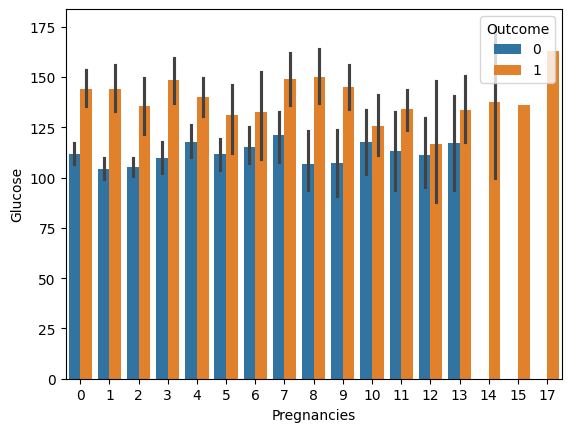

In [ ]:
#임신횟수에 따른 포도당 수치를 당뇨병 발병 여부에 따라 시각하
sns.barplot(data=df, x = "Pregnancies", y="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='BMI'>

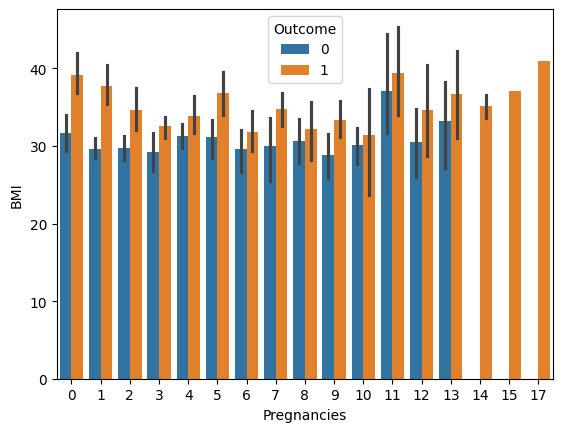

In [ ]:
sns.barplot(data=df, x = "Pregnancies", y="BMI", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

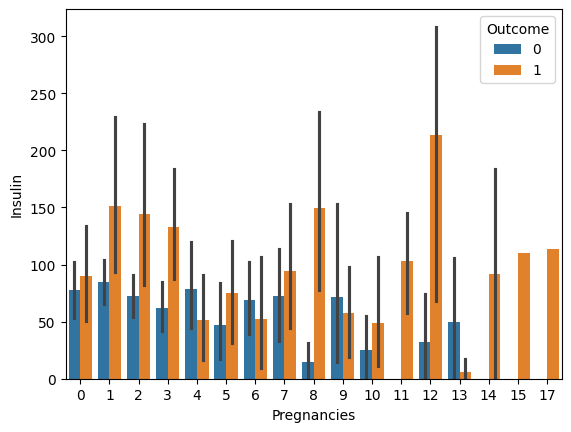

In [ ]:
sns.barplot(data=df, x = "Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

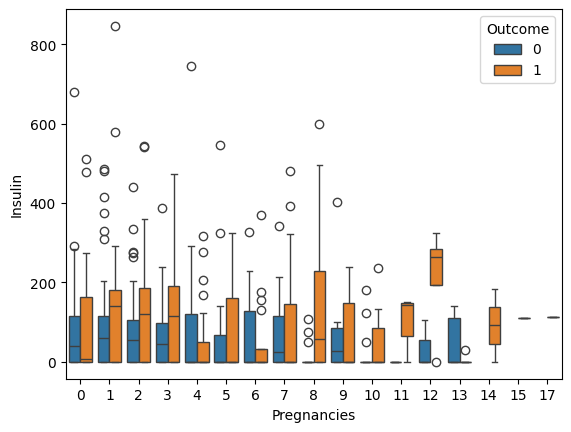

In [ ]:
sns.boxplot(data= df, x = "Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

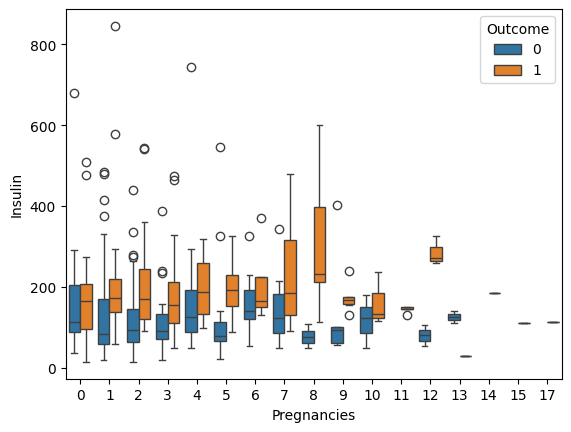

In [ ]:
sns.boxplot(data=df[df["Insulin"] > 0], x = "Pregnancies", y="Insulin", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

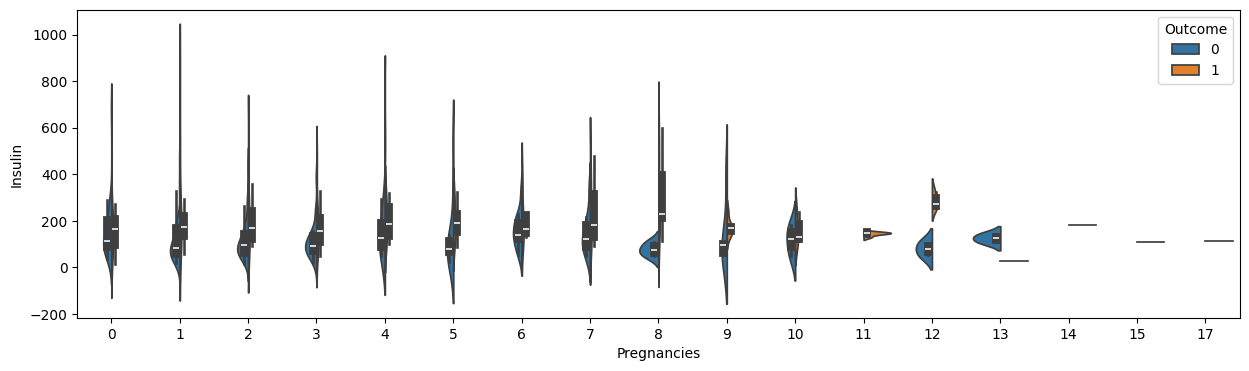

In [ ]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[df["Insulin"] > 0],
               x = "Pregnancies", y="Insulin", hue="Outcome", split=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


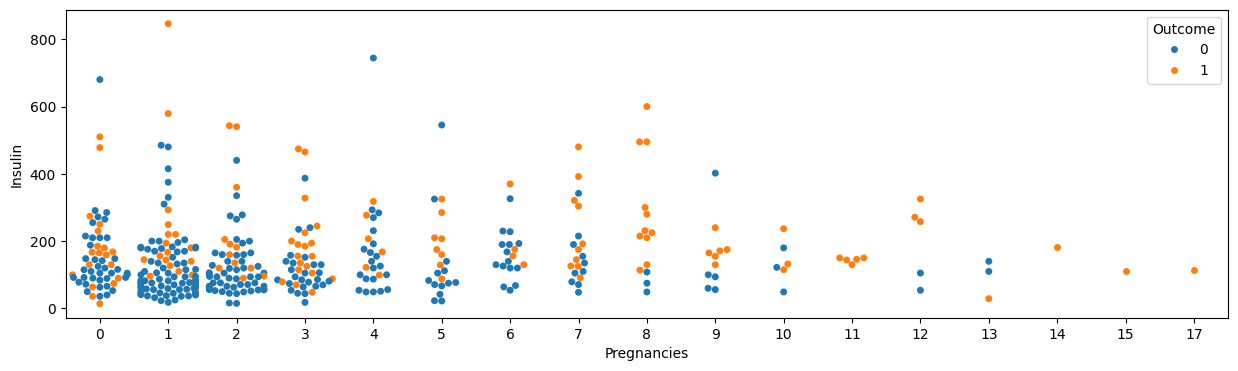

In [ ]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"] > 0],
               x = "Pregnancies", y="Insulin", hue="Outcome")

<ipython-input-31-243b421bb1ed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
<ipython-input-31-243b421bb1ed>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

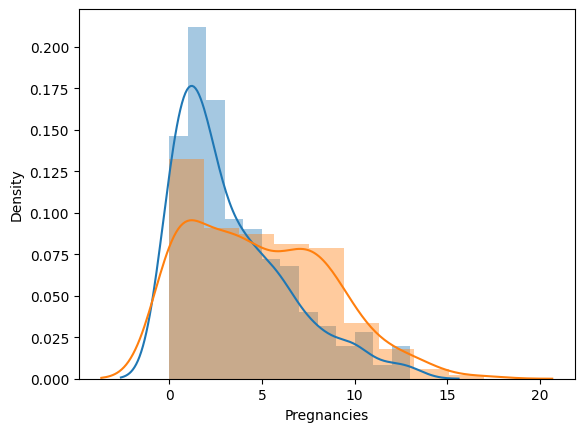

In [ ]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

<ipython-input-32-ea734be30f9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist = False, rug = True, label = 0)
<ipython-input-32-ea734be30f9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist = False, rug = True, label = 1)


<Axes: xlabel='Age', ylabel='Density'>

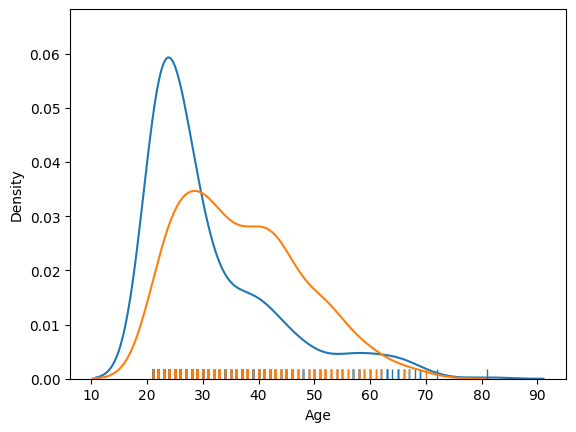

In [ ]:
sns.distplot(df_0["Age"], hist = False, rug = True, label = 0)
sns.distplot(df_1["Age"], hist = False, rug = True, label = 1)

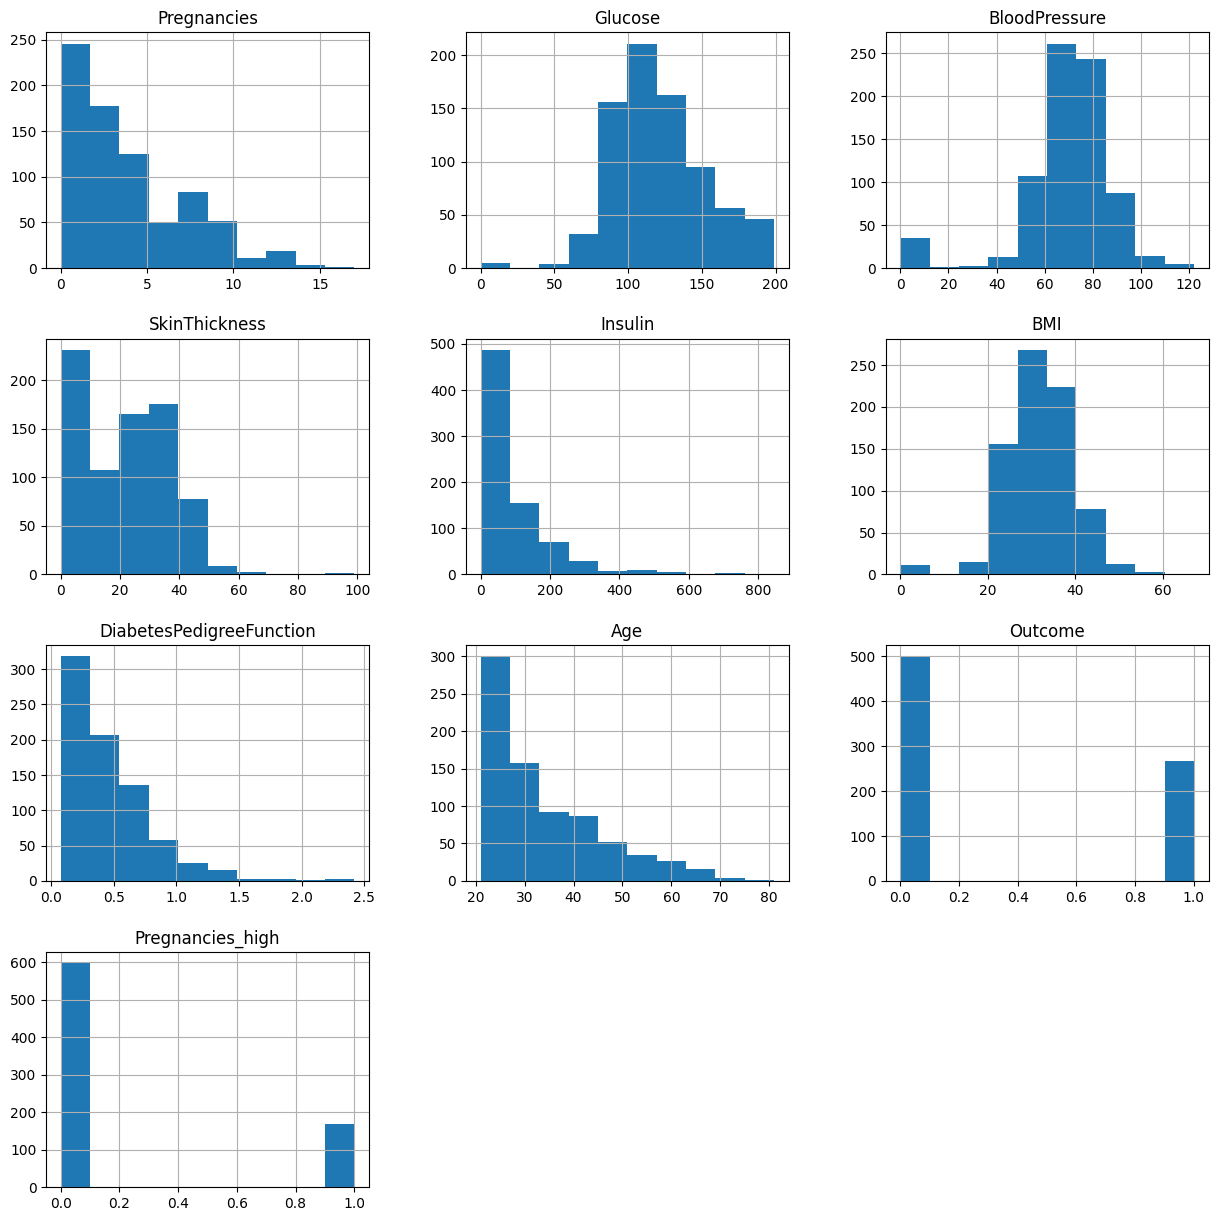

In [ ]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
#histplot이 bool지원이 안됨

h = df.hist(figsize=(15, 15))

In [ ]:
col_num = df.columns.shape
col_num

(10,)

0 Pregnancies 0
1 Glucose 0
2 BloodPressure 0


<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a de

3 SkinThickness 1
4 Insulin 1
5 BMI 1


<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a de

6 DiabetesPedigreeFunction 2
7 Age 2
8 Outcome 2


<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
<ipython-input-35-9bfb52e3fb04>:8: UserWarning: 

`distplot` is a de

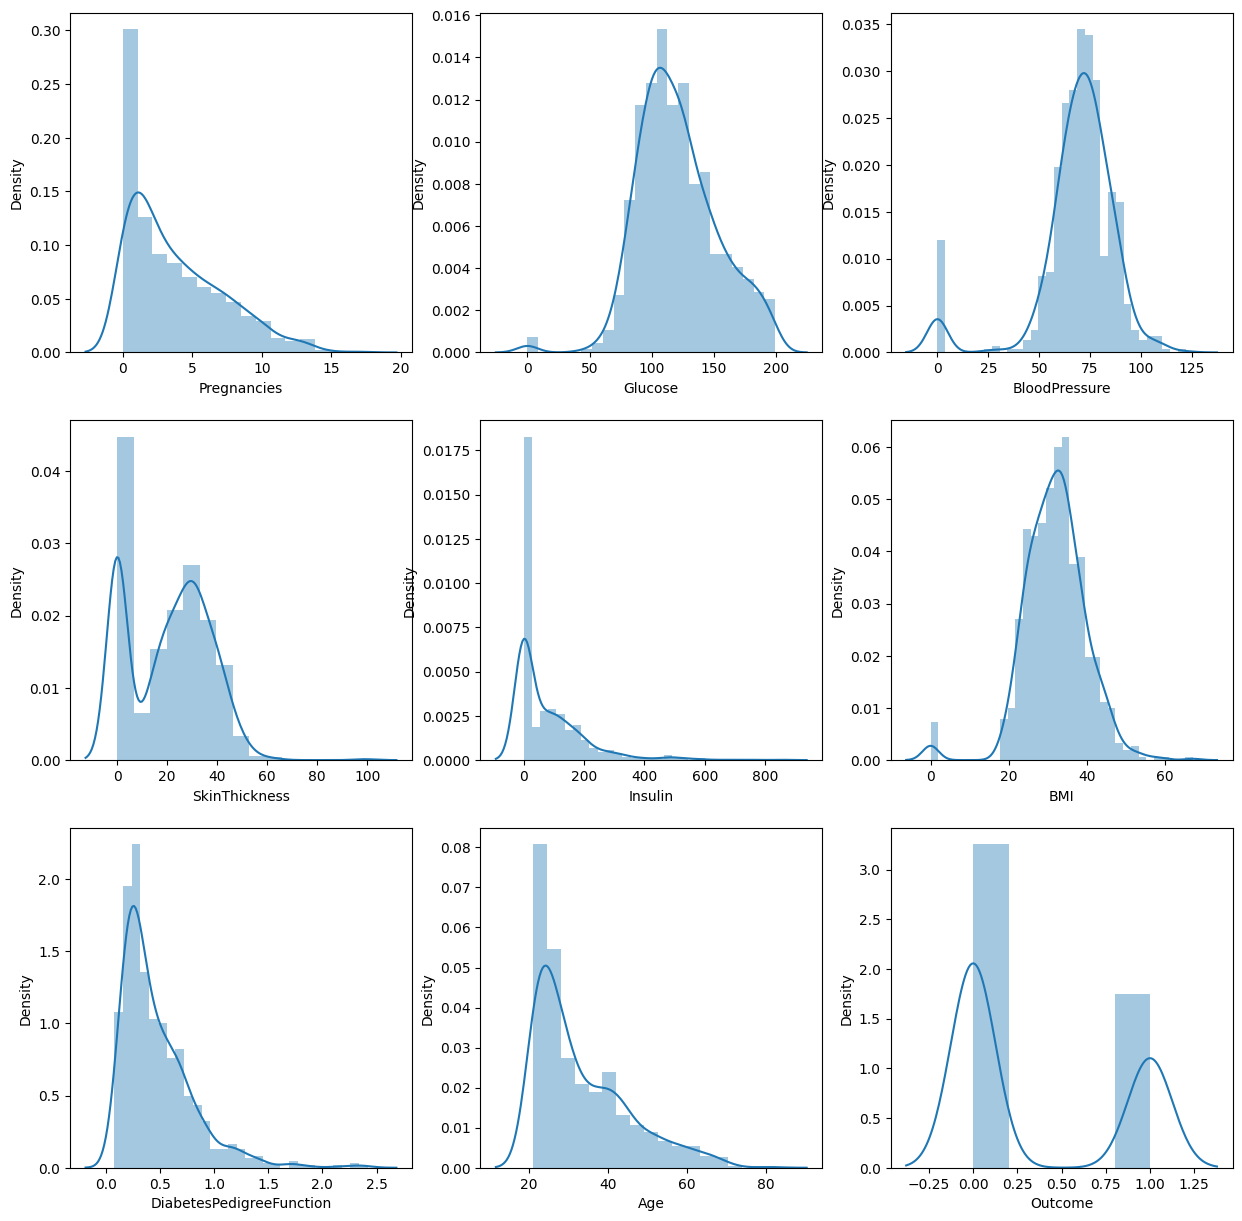

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
cols = df.columns[:-1].tolist()

for i, col_name in enumerate(cols):
  row = i//3
  col = i%3
  print(i, col_name, row)
  sns.distplot(df[col_name], ax=axes[row][col])

0 Pregnancies 0
1 Glucose 0


<ipython-input-36-55da4bd4ffb2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:7: UserWarning: 

`distplot` is 

2 BloodPressure 1
3 SkinThickness 1


<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is 

4 Insulin 2
5 BMI 2


<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is 

6 DiabetesPedigreeFunction 3
7 Age 3


<ipython-input-36-55da4bd4ffb2>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])


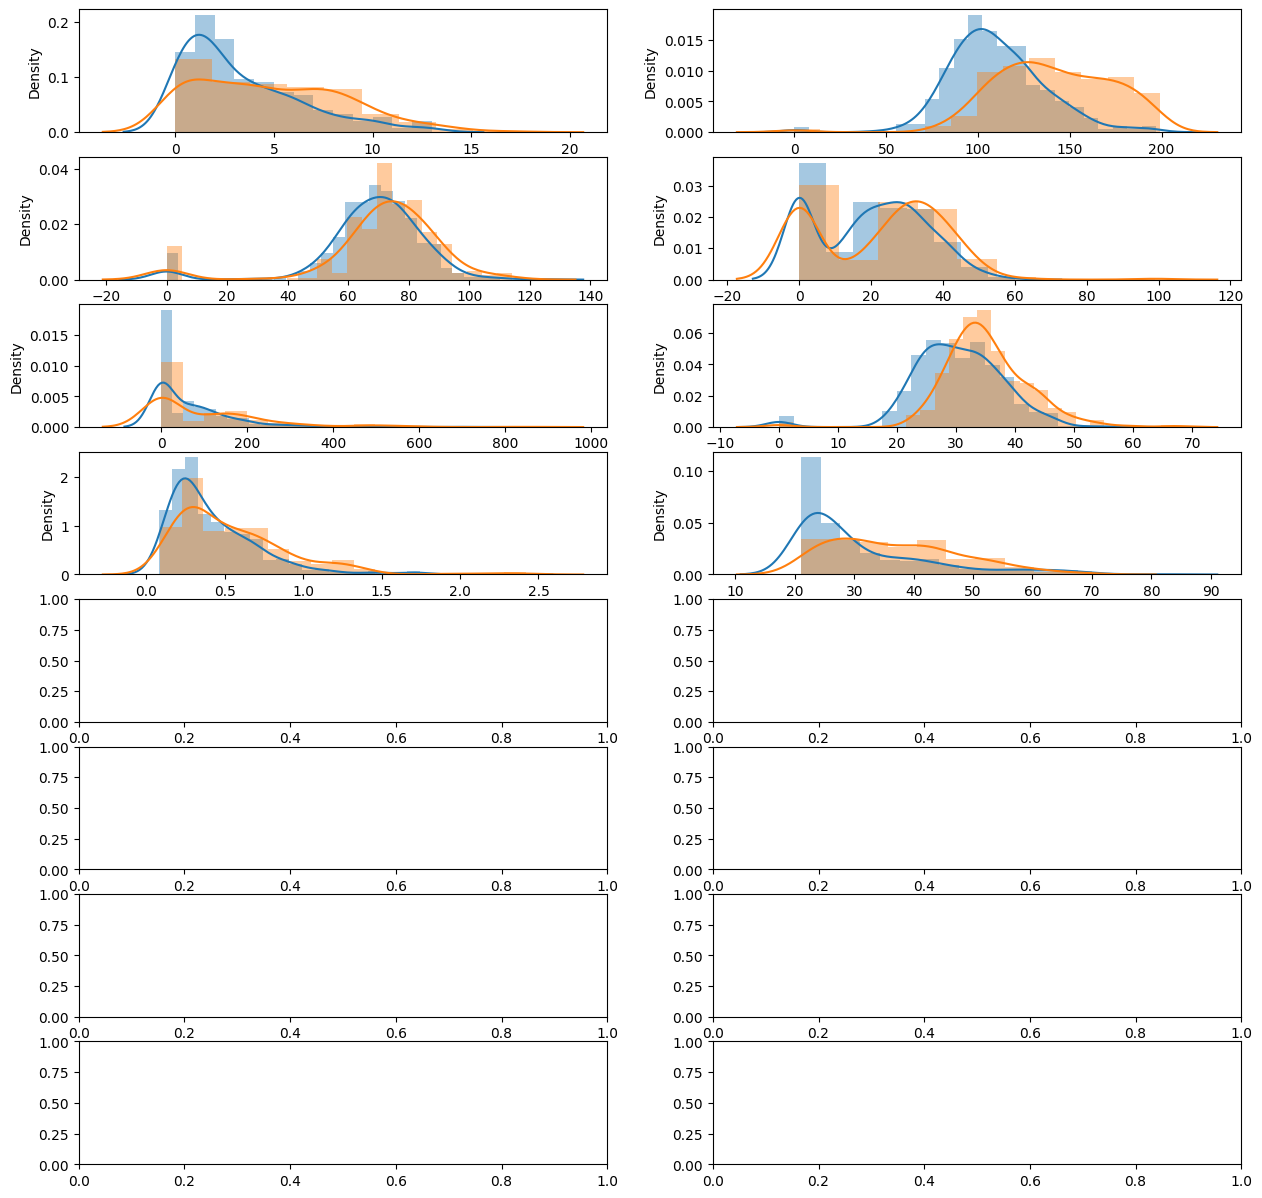

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]): #Outcome 빼고
  row = i//2
  col = i%2
  print(i, col_name, row)
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])

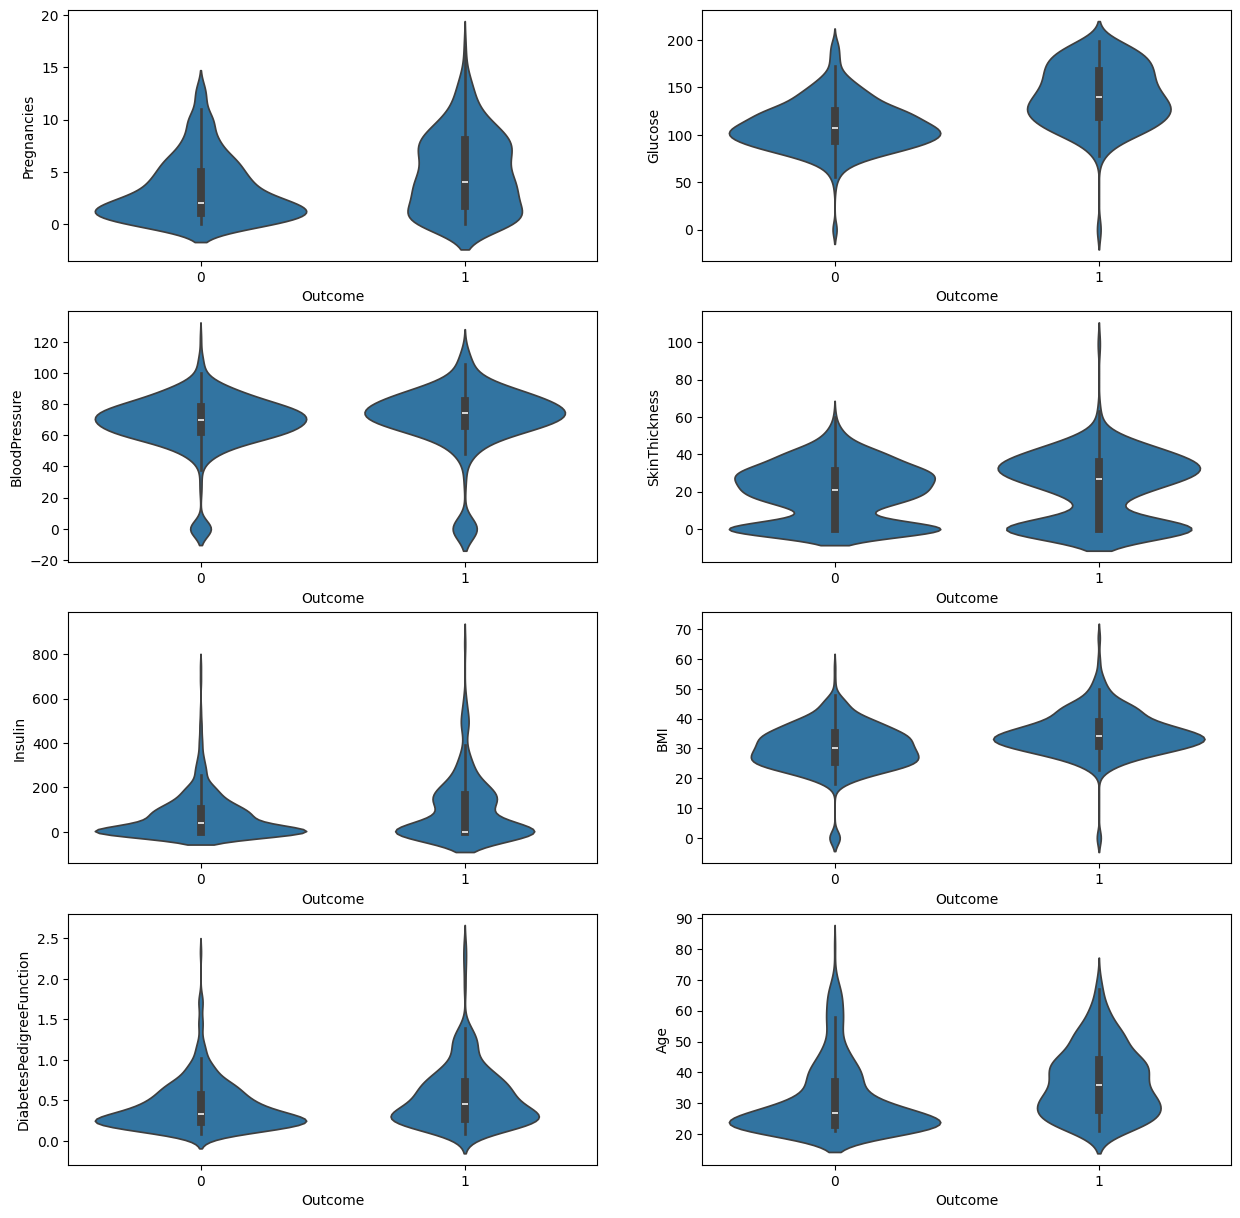

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]): #Outcome 빼고
  row = i//2
  col = i%2
  sns.violinplot(data = df, x = "Outcome", y=col_name, ax=axes[row][col])

<Axes: xlabel='Glucose', ylabel='Insulin'>

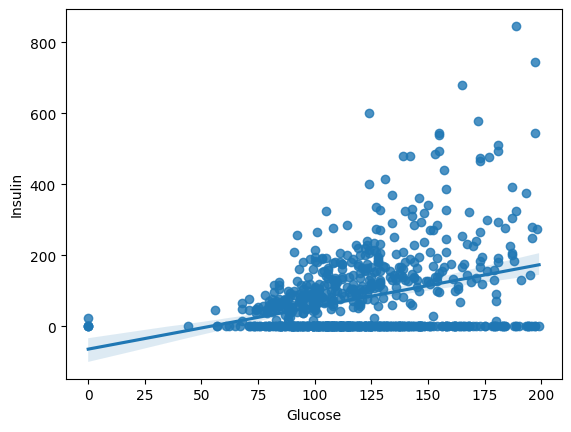

In [ ]:
sns.regplot(data=df, x="Glucose", y="Insulin")

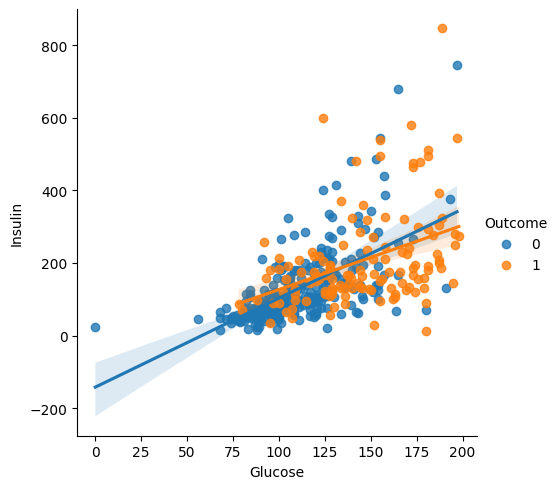

In [ ]:
sns.lmplot(data=df[df["Insulin"] > 0 ], x="Glucose", y="Insulin", hue="Outcome")

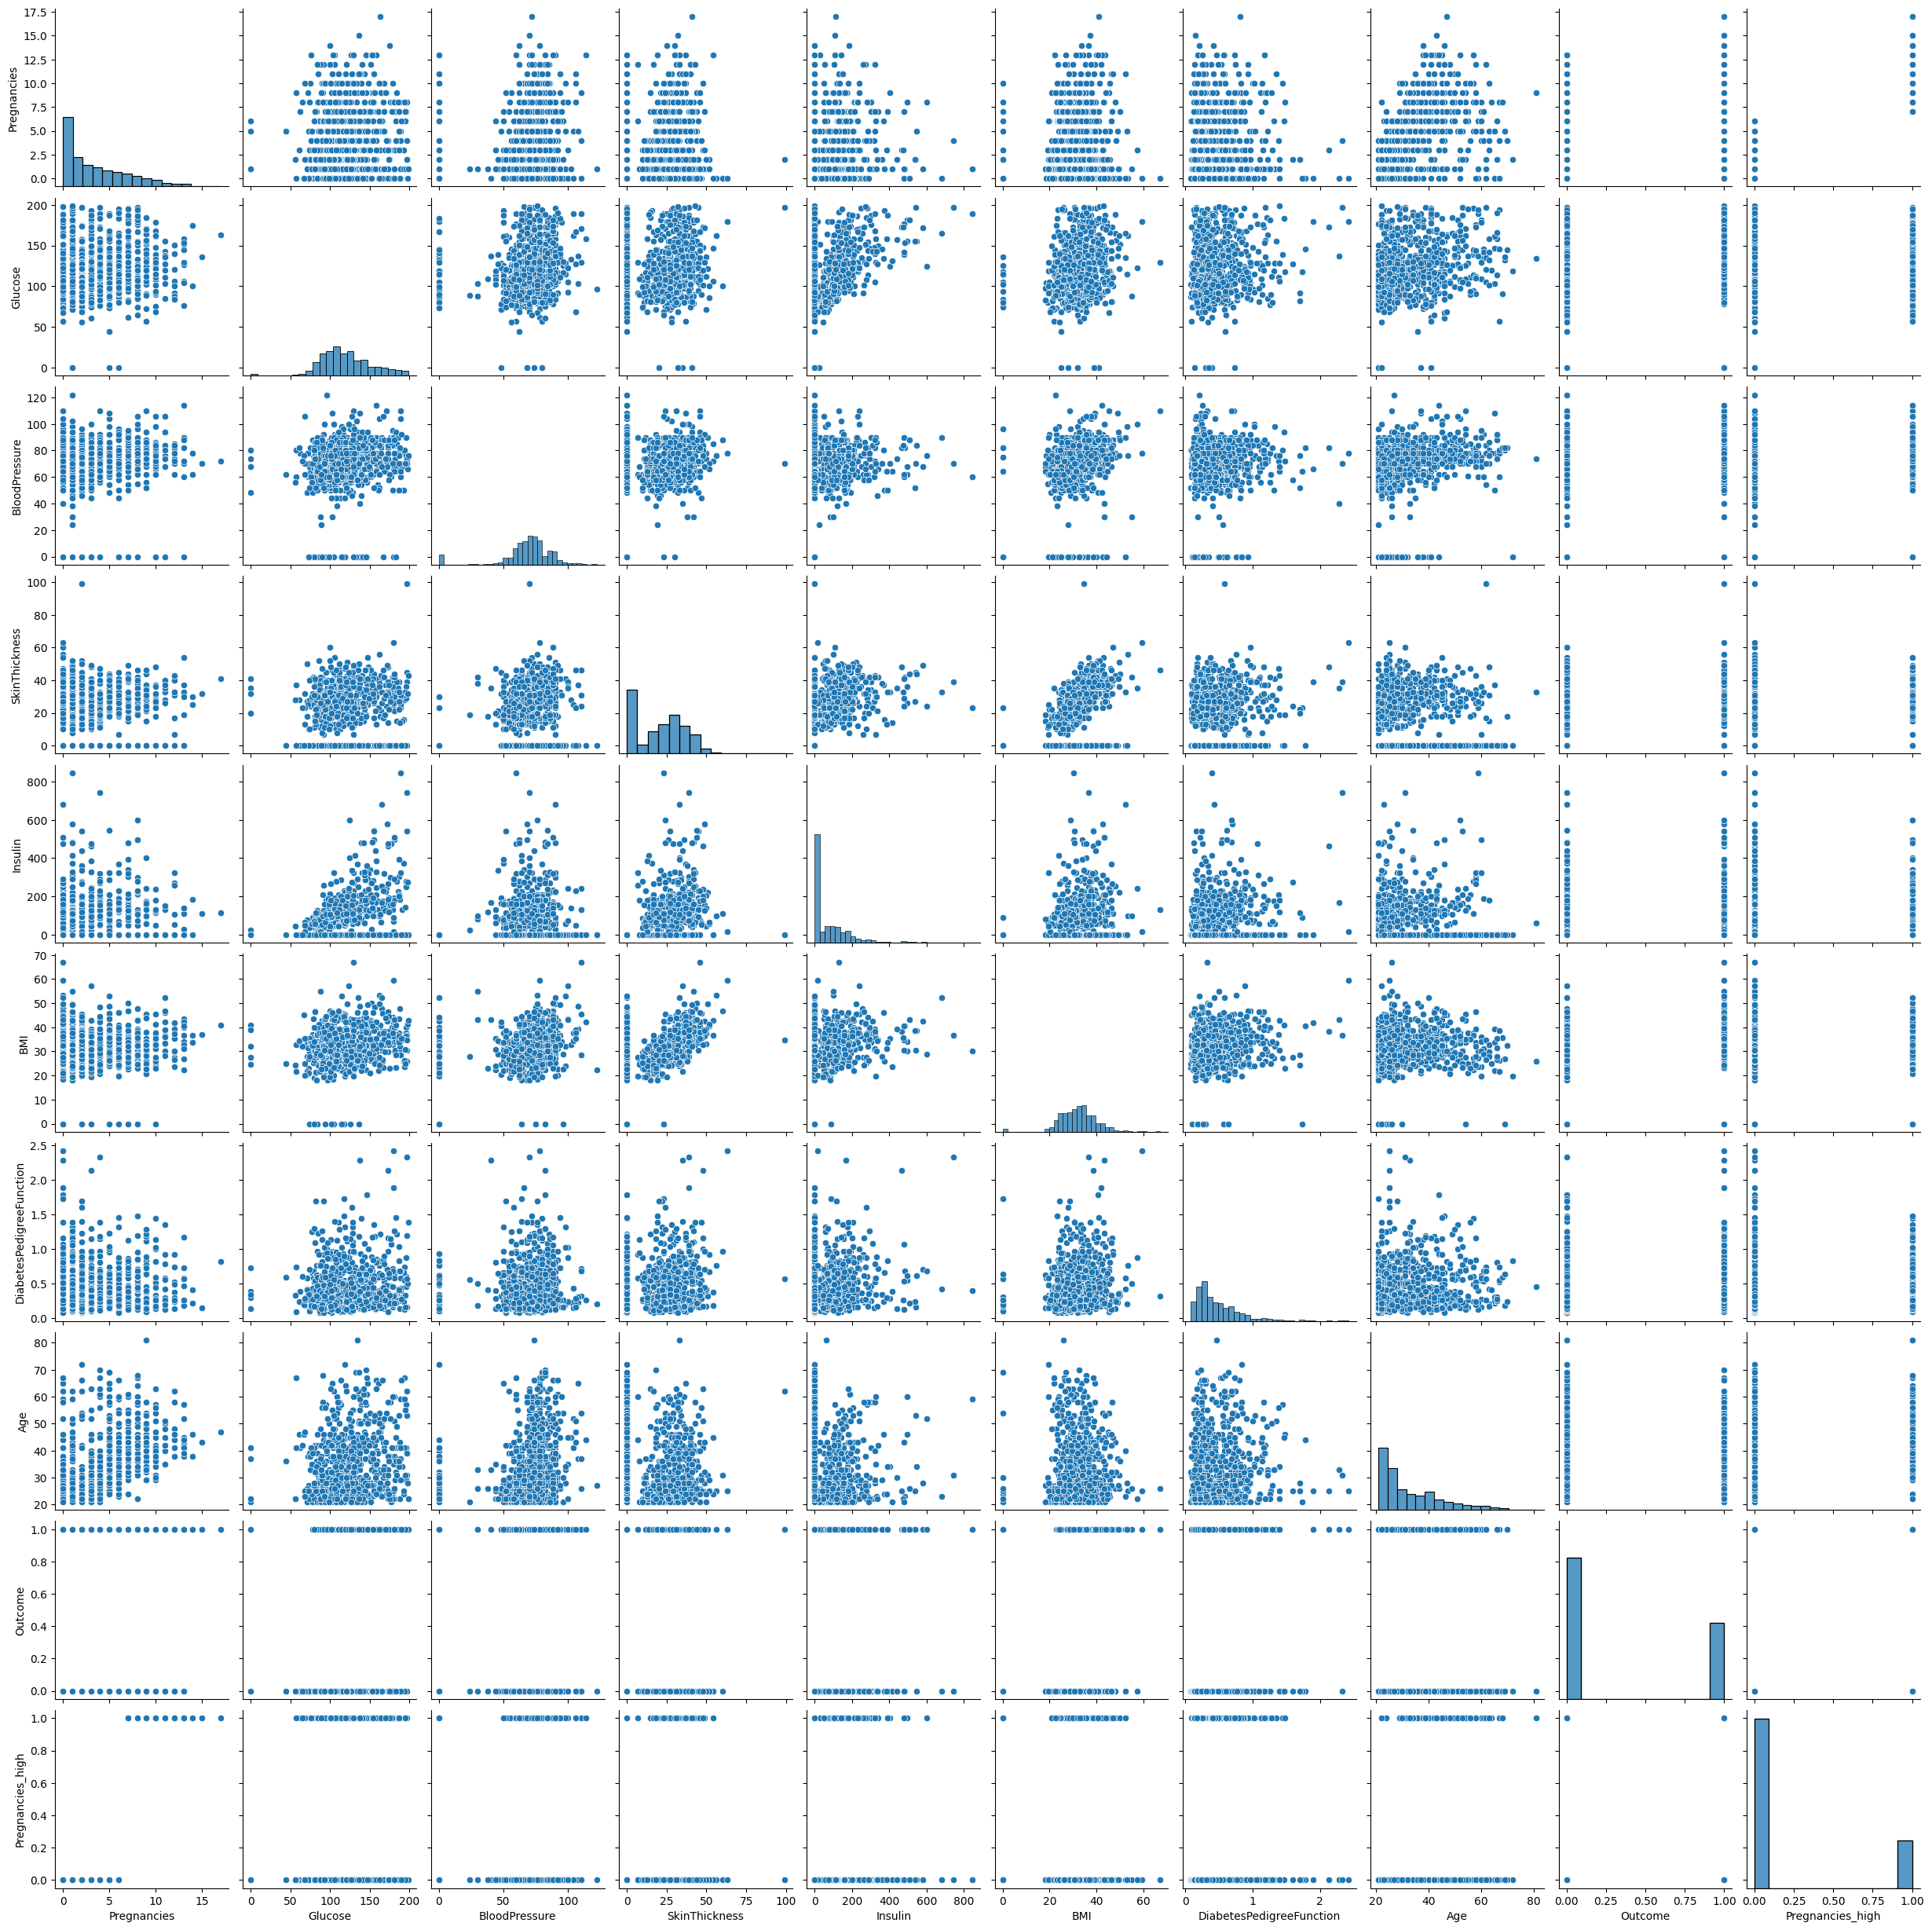

In [ ]:
sns.pairplot(df) #모든 변수에 대해 Outcome에 따른 scatterplot을 그림

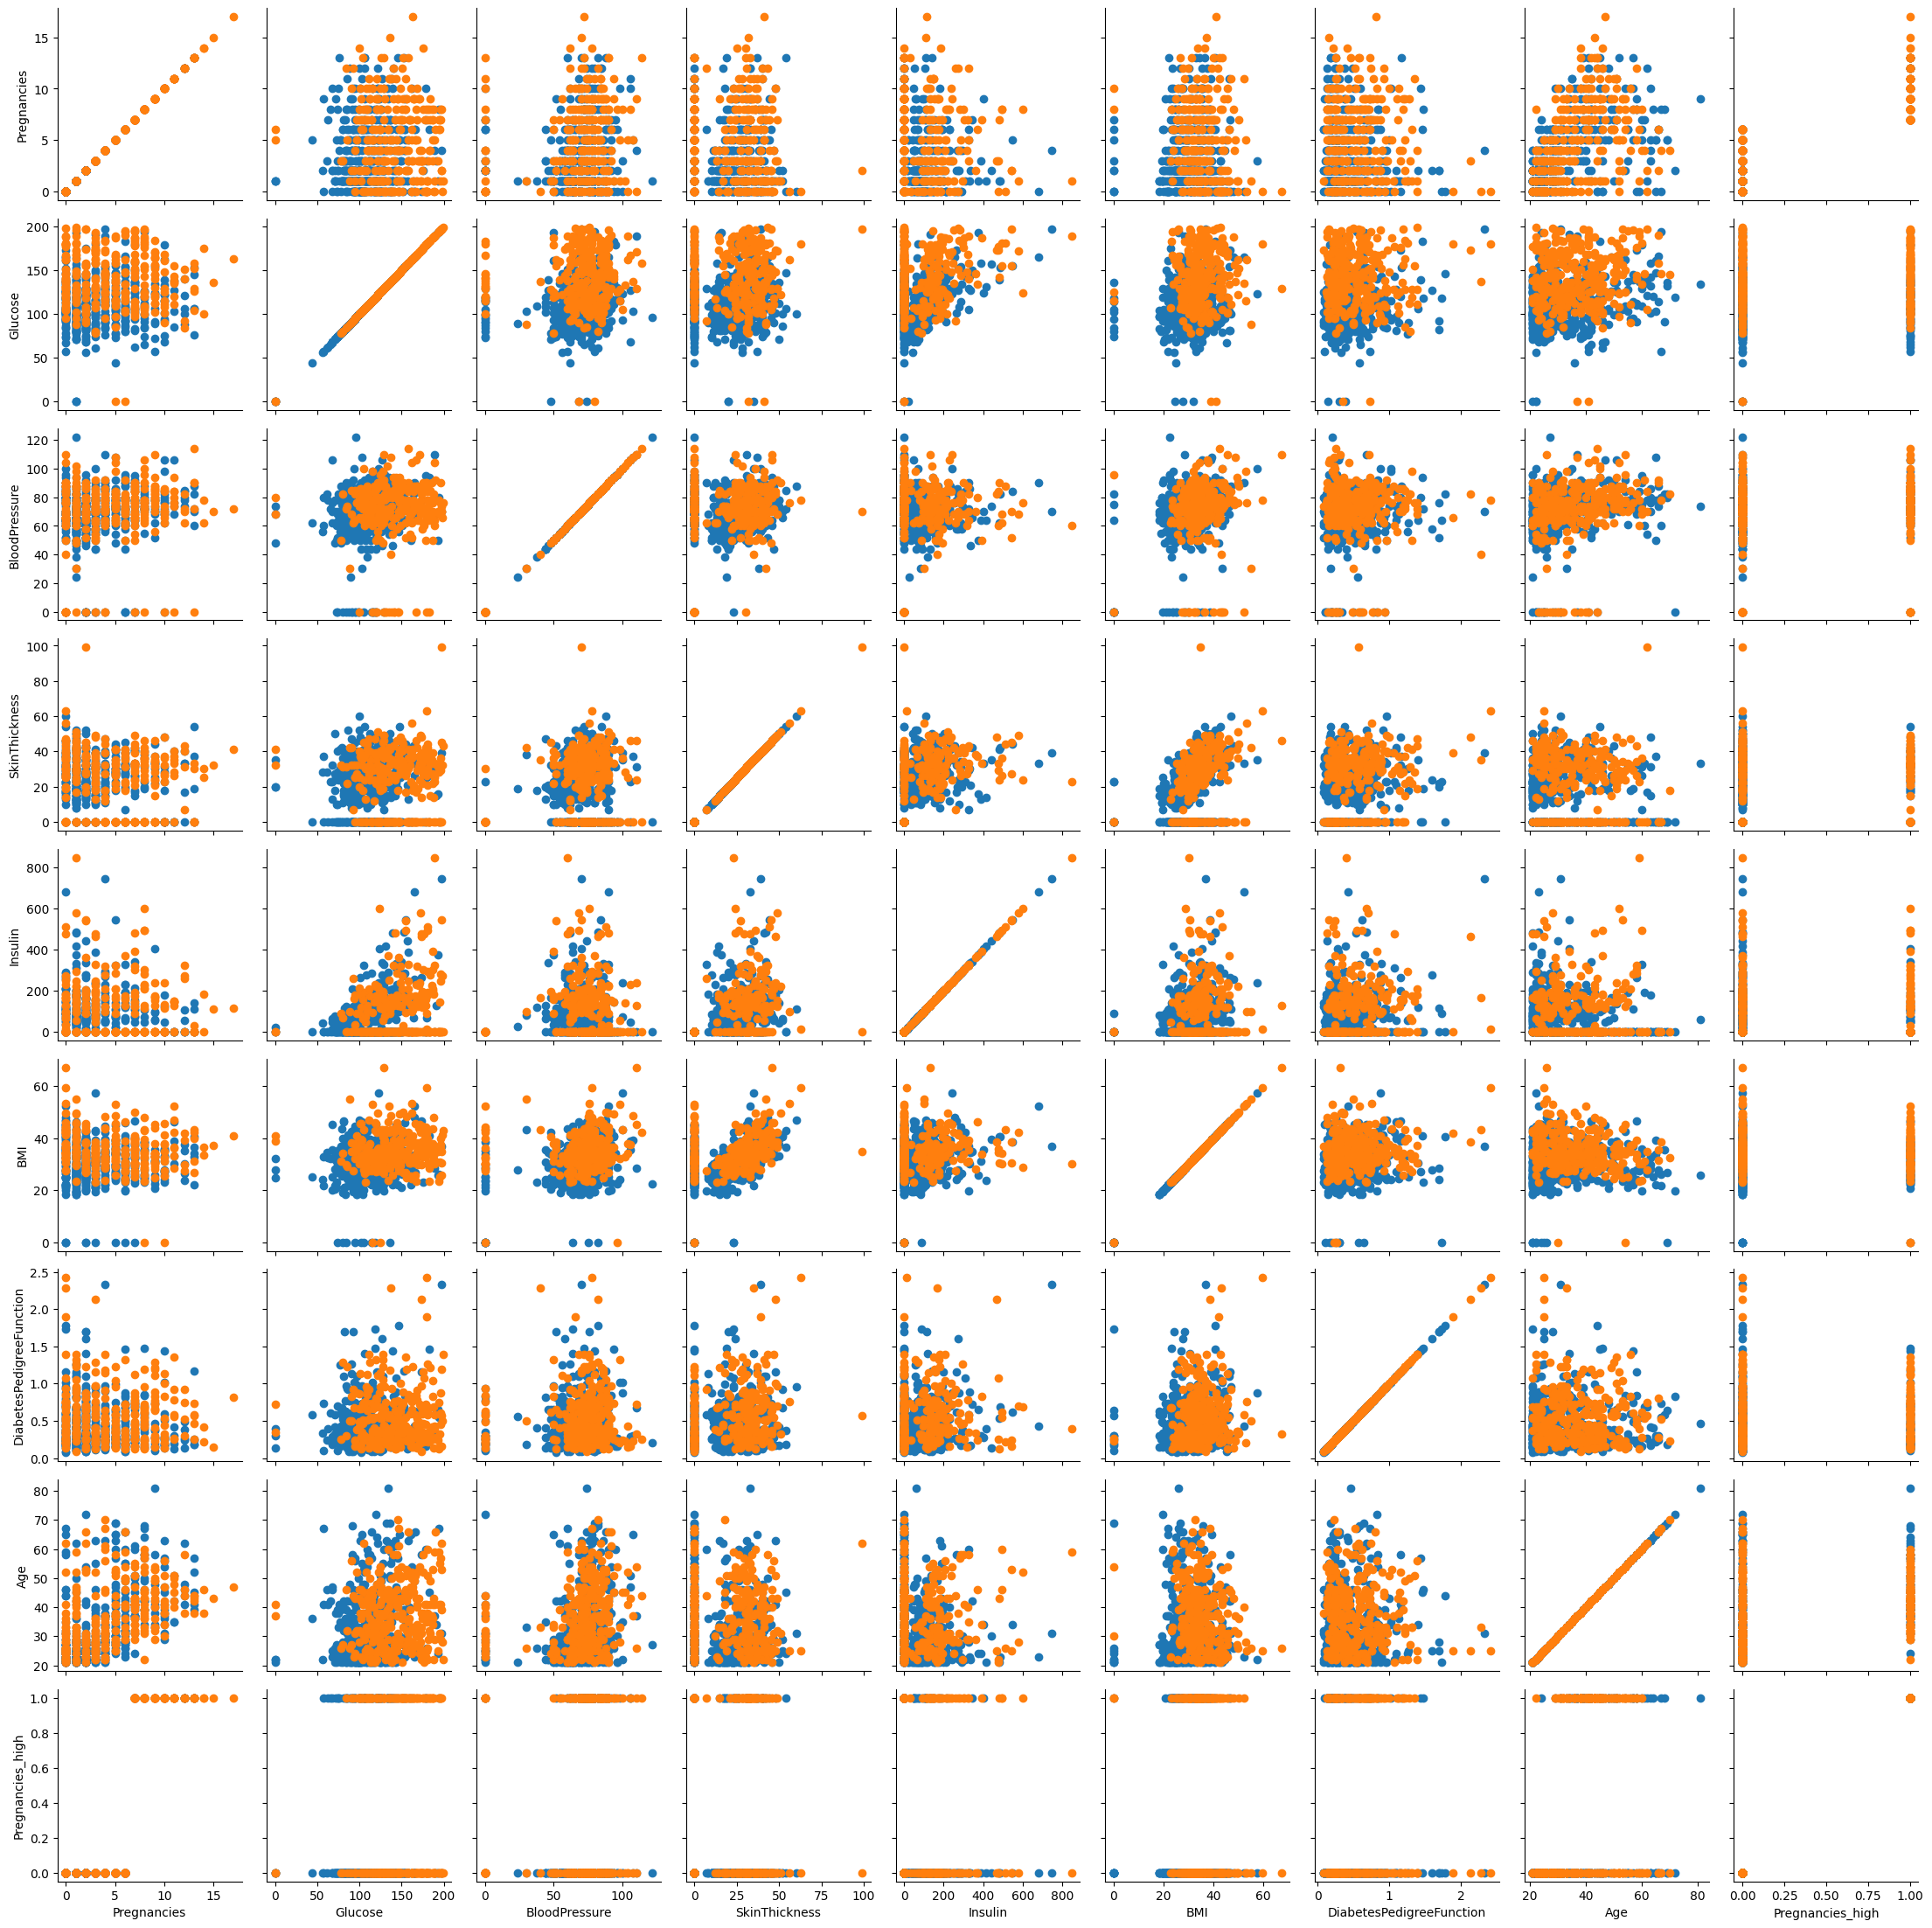

In [ ]:
g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

In [ ]:
df_corr = df.corr()
df_corr.style.background_gradient()

<Axes: >

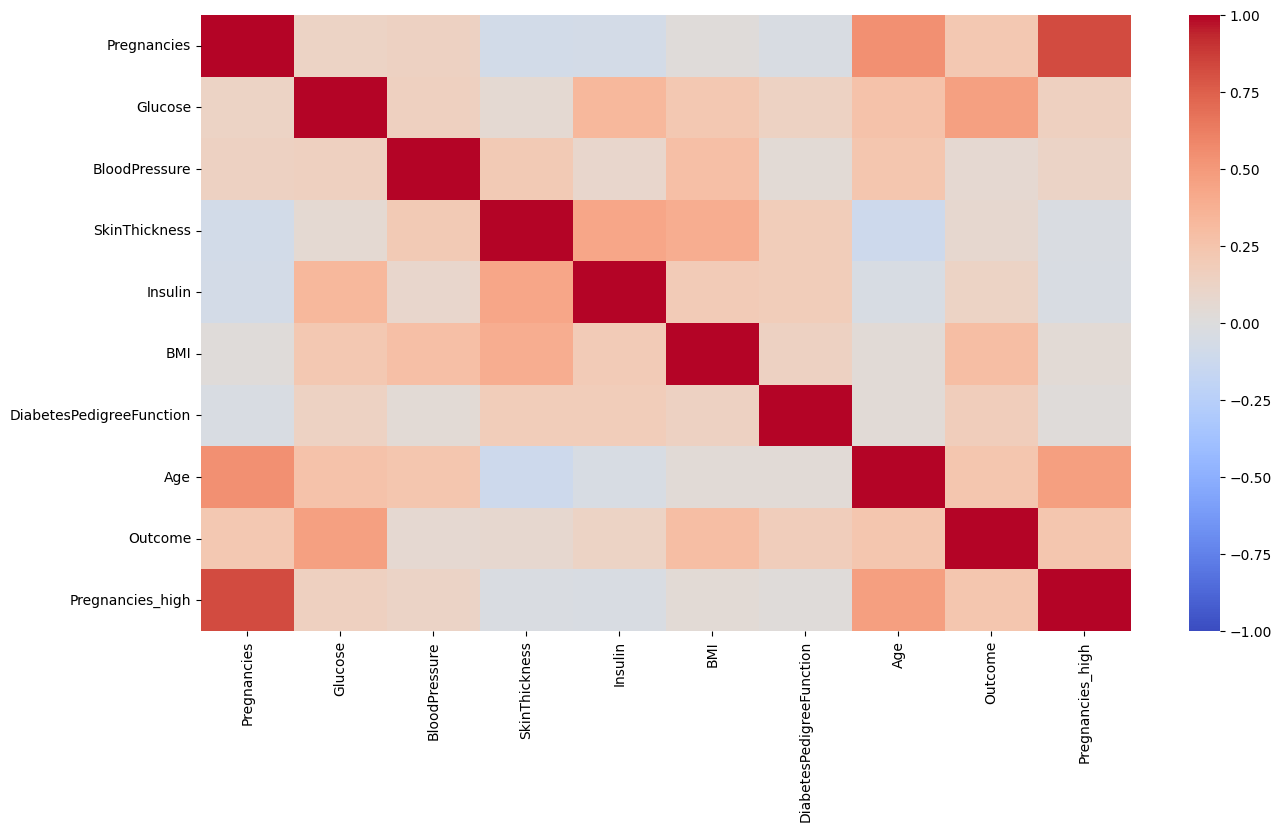

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, vmax=1, vmin = -1, cmap="coolwarm")

<Axes: >

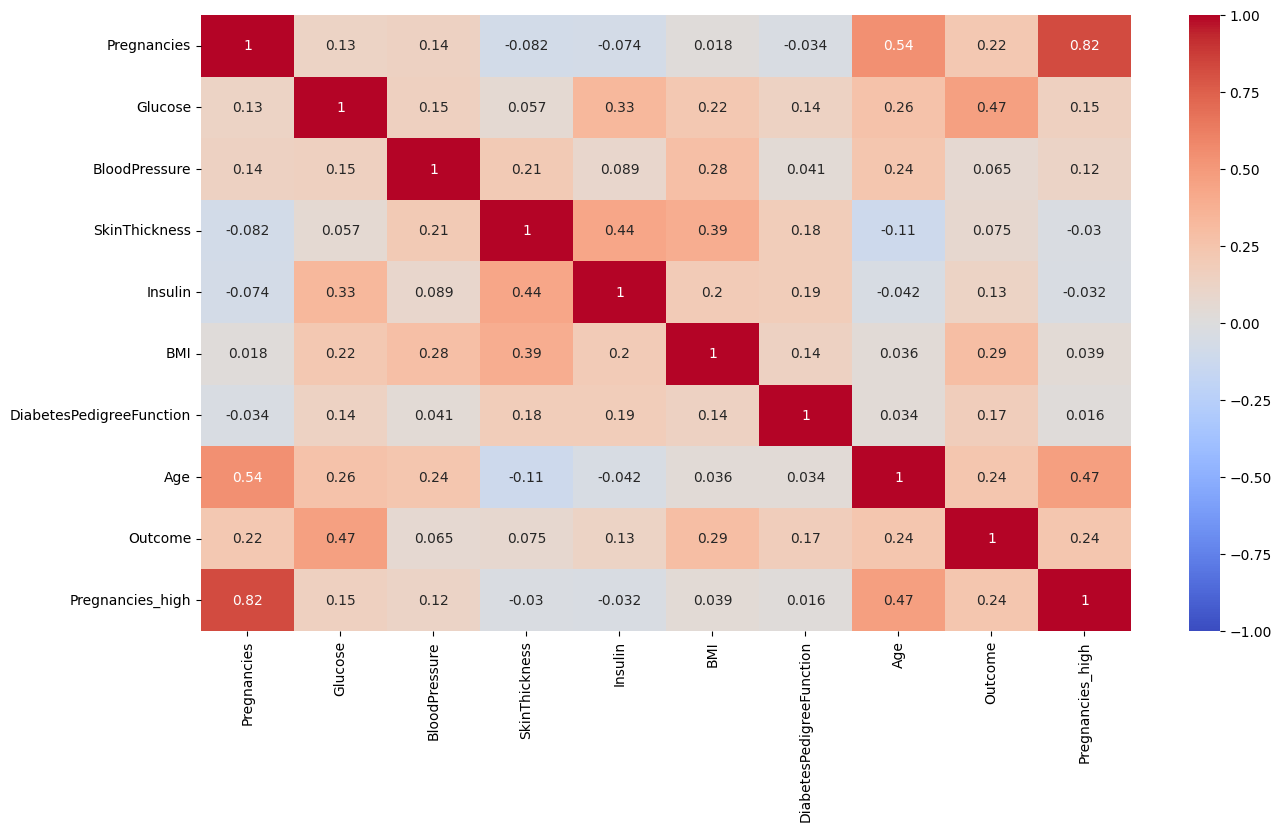

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot = True, vmax=1, vmin = -1, cmap="coolwarm")

In [ ]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan) #outcome과 preg_high제외하고 결측치 만들기
df_matrix["Outcome"] = df["Outcome"]

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

<Axes: >

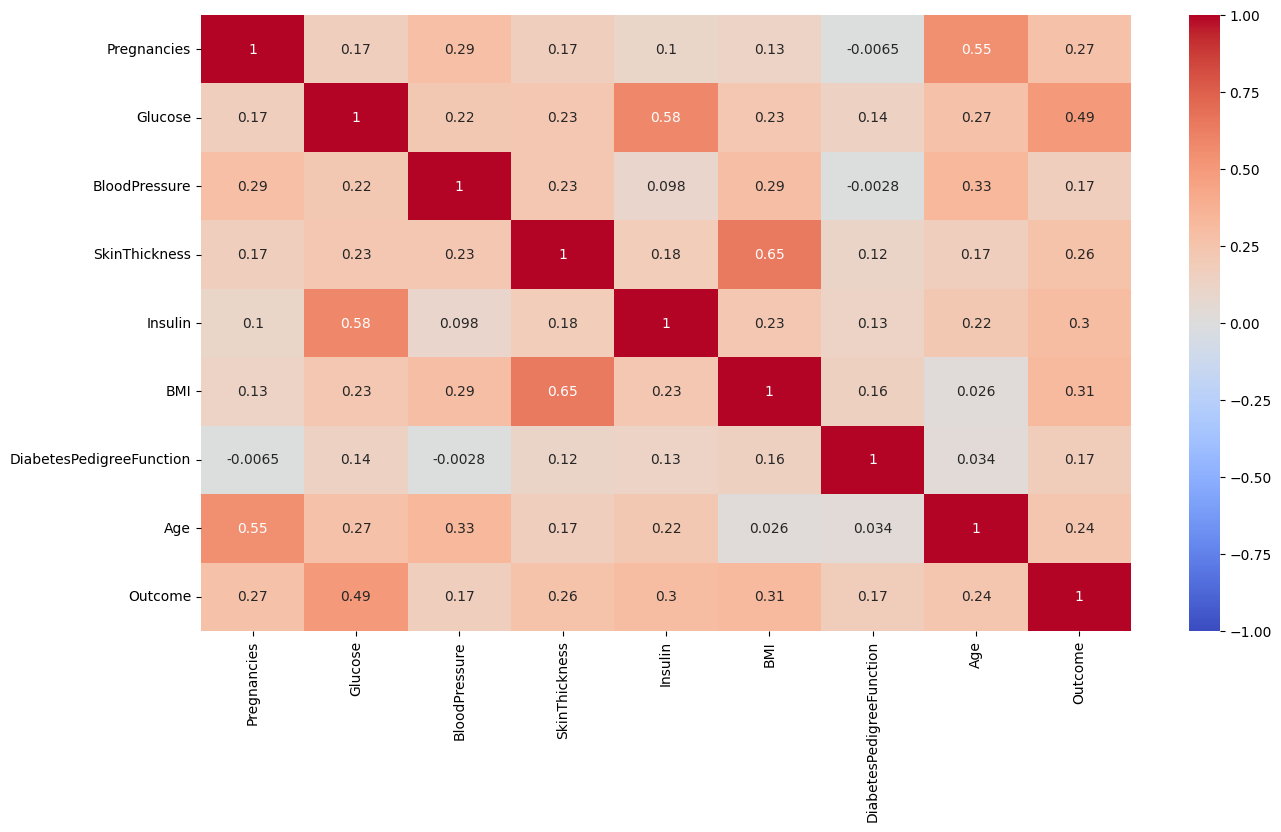

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot = True, vmax=1, vmin = -1, cmap="coolwarm")

In [ ]:
df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: xlabel='Insulin', ylabel='Glucose'>

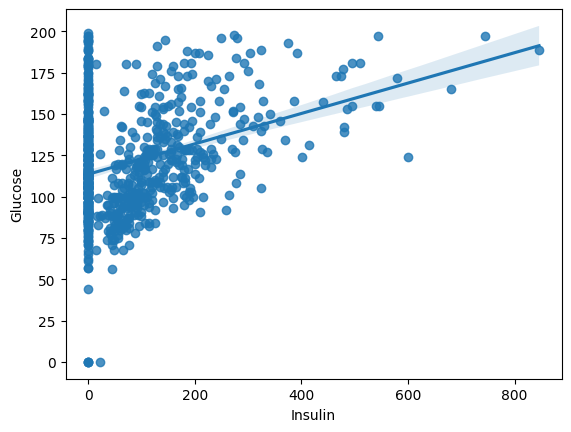

In [ ]:
sns.regplot(data=df, x="Insulin", y="Glucose")

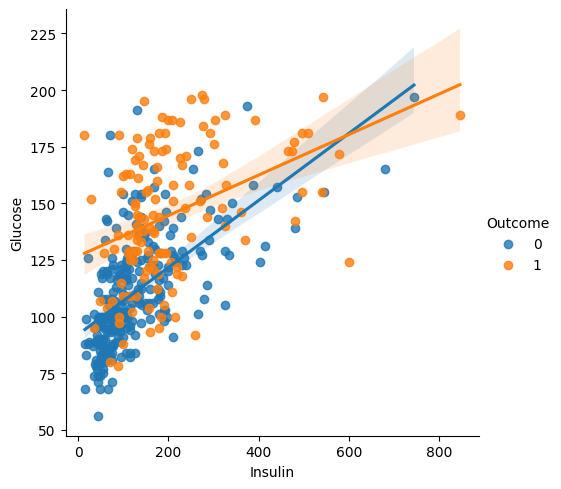

In [ ]:
sns.lmplot(data=df_matrix, x= "Insulin", y = "Glucose", hue="Outcome")

<Axes: xlabel='Age', ylabel='Pregnancies'>

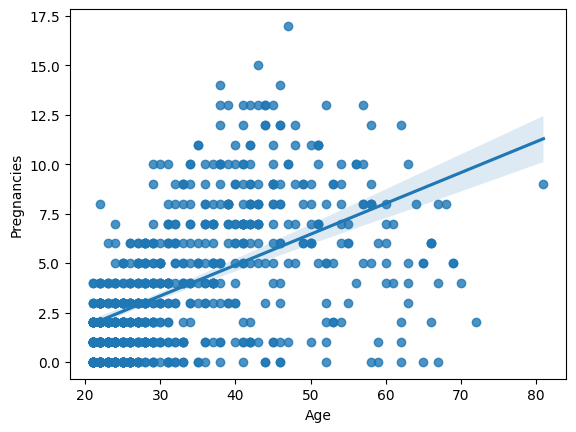

In [ ]:
sns.regplot(data=df, x="Age", y="Pregnancies")

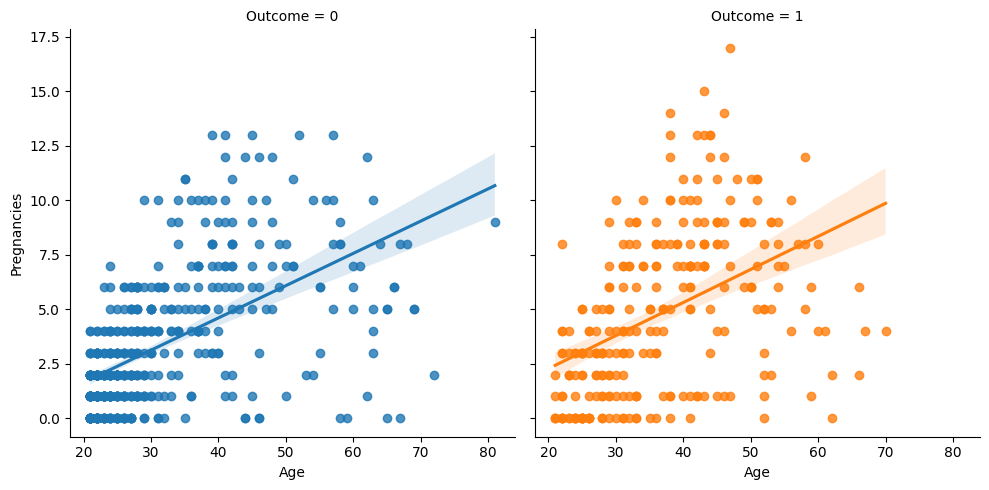

In [ ]:
sns.lmplot(data = df, x = "Age", y="Pregnancies", hue = "Outcome", col = "Outcome")